<a href="https://colab.research.google.com/github/preranaarage0612/Exploratory-car-data-machine-learning/blob/master/cardata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imporing Libarires**



In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import plotly.express as px

**Loading the data into Dataframe**

In [259]:
df = pd.read_csv('data.csv')
#top five rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [260]:
#bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**Checking the Datatypes**

In [261]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

**Details of dataframe**

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Statistical Summary**

In [263]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**Dropping the less revelant columns**


In [264]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors','Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


**Renaming the columns**


In [265]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


**Dropping the Duplicate Rows**


In [266]:
df.shape


(11914, 11)

In [267]:
duplicate_rows_df = df[df.duplicated()]             #checking the duplicate rows
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 11)


In [268]:
# dropping duplicate rows
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


**Dropping the Missing Values**


In [269]:
print(df.isnull().sum())      #checking the null values

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


In [270]:
# dropping the values
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Popularity      10827
Price           10827
dtype: int64

In [271]:
# after dropping the values
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Popularity      0
Price           0
dtype: int64


**Detecting Outliers**


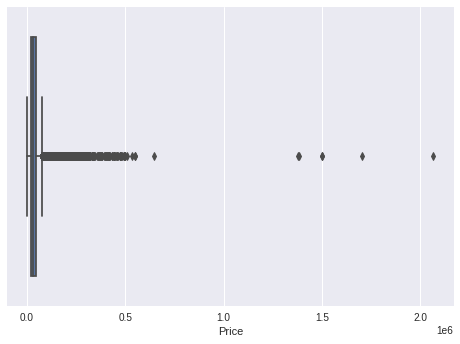

In [272]:
sns.boxplot(x=df['Price'])            #Boxplot of Price

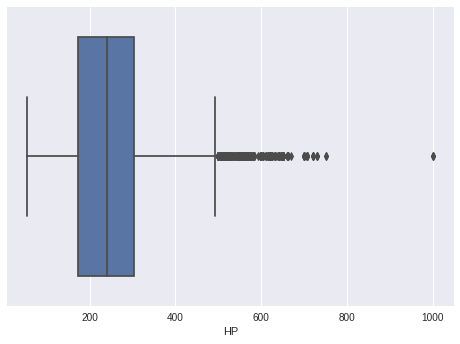

In [273]:
sns.boxplot(x=df['HP'])             #Boxplot of HP

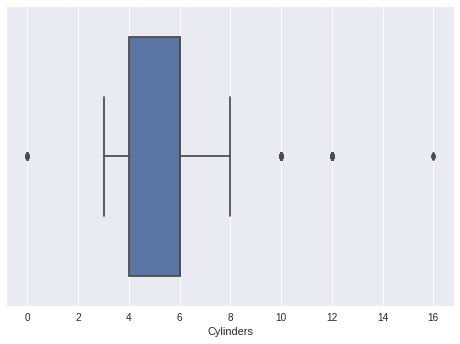

In [274]:
sns.boxplot(x=df['Cylinders'])        #Boxplot of Cylinders

**Removing Outliers using IQR**

In [275]:
Q1 = df.quantile(0.25)        #calculating IQR
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21327.5
dtype: float64


In [276]:
print((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))      #if the value is True it is an outlier

       Cylinders  Drive Mode     HP  ...  Price  Transmission   Year
0          False       False  False  ...  False         False  False
1          False       False  False  ...  False         False  False
2          False       False  False  ...  False         False  False
3          False       False  False  ...  False         False  False
4          False       False  False  ...  False         False  False
...          ...         ...    ...  ...    ...           ...    ...
11909      False       False  False  ...  False         False  False
11910      False       False  False  ...  False         False  False
11911      False       False  False  ...  False         False  False
11912      False       False  False  ...  False         False  False
11913      False       False  False  ...  False         False  False

[10827 rows x 11 columns]


In [277]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]    #removing outlier
df.shape

(8438, 11)

**After removing Outliers**

Boxplot of Price

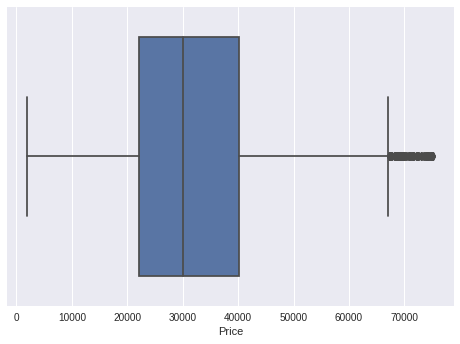

In [278]:
sns.boxplot(x=df['Price'])

Boxplot of HP

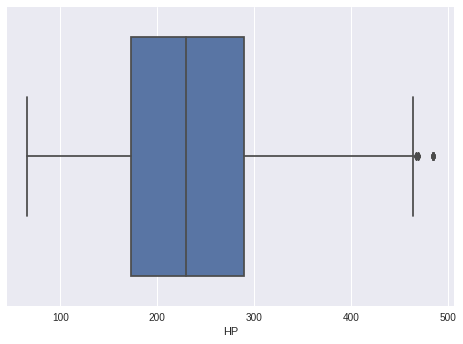

In [279]:
sns.boxplot(x=df['HP'])

Boxplot of Cylinders

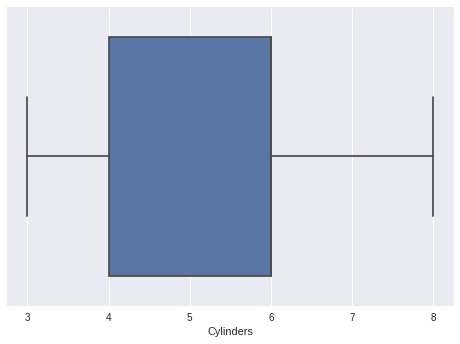

In [280]:
sns.boxplot(x=df['Cylinders'])

**Top Brands**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



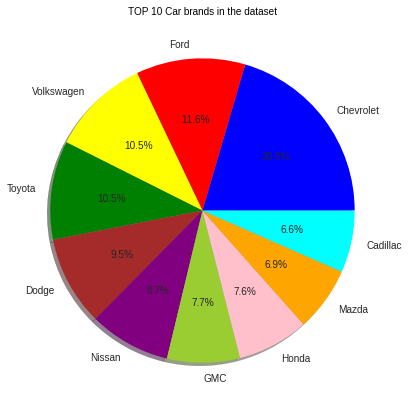

In [281]:
carr=df['Make'].value_counts().head(10).to_frame()
m= carr.style.background_gradient(cmap='Blues')
colors=['blue','red','yellow','green','brown','purple','yellowgreen','pink','orange','aqua']
label= ['Chevrolet','Ford','Volkswagen','Toyota','Dodge','Nissan','GMC','Honda','Mazda','Cadillac']
sizes= ['1123','881','809','746','626','530','420','315','200','110']
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
values=df['Make'].value_counts().head(10).to_frame()

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=label,colors=colors,autopct='%1.1f%%', shadow=True)
plt.title('TOP 10 Car brands in the dataset',color='black',fontsize=10)
plt.show()

**Average of Top car brands**

In [282]:
prices = df[['Make','Price']].loc[(df['Make'].isin(label))].groupby('Make').mean()
print(prices)

                   Price
Make                    
Cadillac    49831.070000
Chevrolet   28630.917083
Dodge       26190.560284
GMC         33462.654506
Honda       27400.455526
Mazda       20495.820106
Nissan      28404.013672
Toyota      27860.319224
Volkswagen  29032.817476




**Correlation Matrix**

In [283]:
df.corr()           #Finding Correlation

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.314687,-0.114560,0.379871,0.339894,0.194792,0.577544
HP,0.314687,1.000000,0.736268,-0.454730,-0.557035,0.092237,0.744946
Cylinders,-0.114560,0.736268,1.000000,-0.692258,-0.747238,0.012965,0.390584
MPG-H,0.379871,-0.454730,-0.692258,1.000000,0.937019,0.092447,-0.123900
MPG-C,0.339894,-0.557035,-0.747238,0.937019,1.000000,0.079140,-0.201820
Popularity,0.194792,0.092237,0.012965,0.092447,0.079140,1.000000,0.108194
Price,0.577544,0.744946,0.390584,-0.123900,-0.201820,0.108194,1.000000


**Plotting Heatmap**

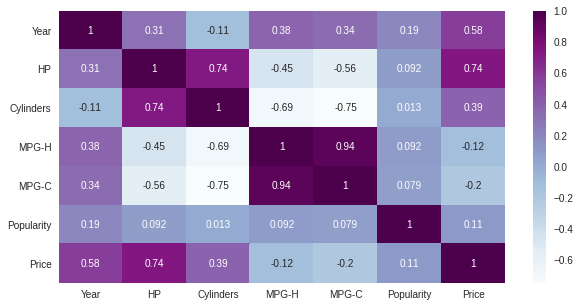

In [284]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap="BuPu", annot=True )

There is a **Positive correlation betweeen:**

HP and Cylinders

HP and Price

Cylinders and Price


**Negative correlation between:**

HP and MPG-H

MPG-C and HP

**Plotting The Graphs**

**Graph Between Cylinders and HP**

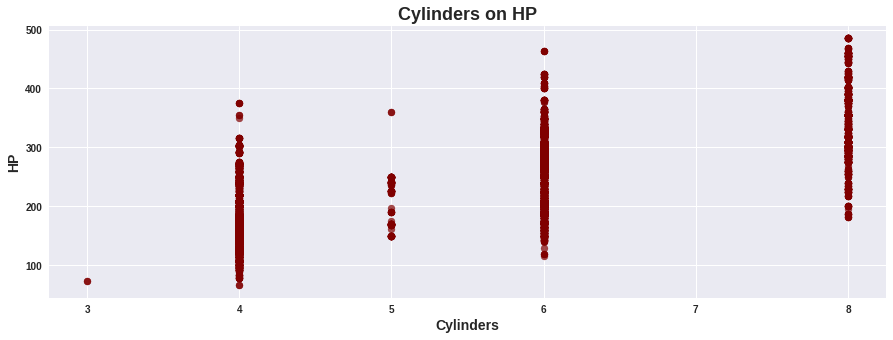

In [285]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['Cylinders'], y=df['HP'], color='maroon', alpha=0.7)
plt.title('Cylinders on HP', weight='bold', fontsize=18)
plt.xlabel('Cylinders', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

**Graph between HP and Price**

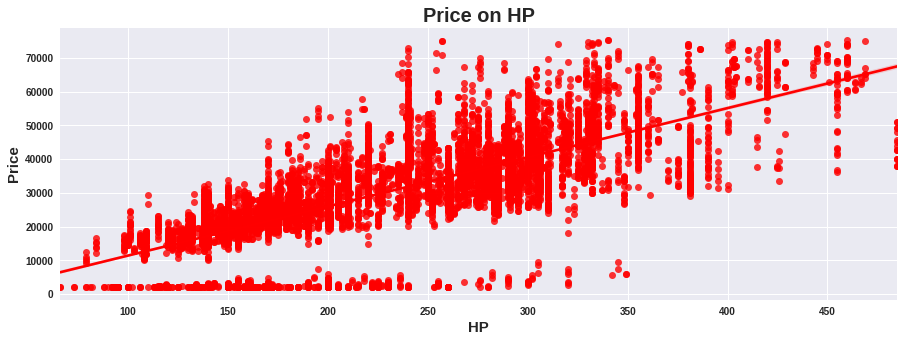

In [286]:
plt.figure(figsize=(15,5))
sns.regplot(x=df['HP'], y=df['Price'], color='red')
plt.title('Price on HP', weight='bold', fontsize=20)
plt.xlabel('HP', weight='bold',fontsize=15)
plt.ylabel('Price', weight='bold', fontsize=15)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

**Graph between Cylinders and Price**

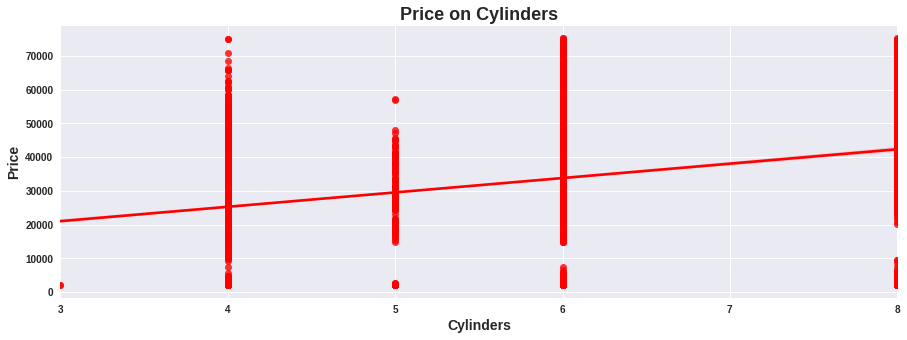

In [287]:
plt.figure(figsize=(15,5))
sns.regplot(x=df['Cylinders'], y=df['Price'], color='red')
plt.title('Price on Cylinders', weight='bold', fontsize=18)
plt.xlabel('Cylinders', weight='bold',fontsize=14)
plt.ylabel('Price', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

**Graph Between MPG-H and HP**

(array([10., 20., 30., 40., 50.]), <a list of 5 Text major ticklabel objects>)

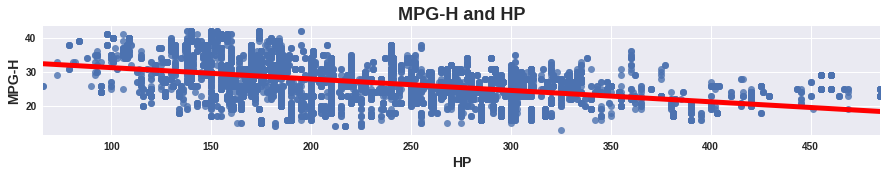

In [288]:
plt.figure(figsize=(15,2))
sns.regplot(x=df["HP"], y=df["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-H and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('MPG-H', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

**Graph Between MPG-C and HP**

(array([ 5., 10., 15., 20., 25., 30., 35.]),
 <a list of 7 Text major ticklabel objects>)

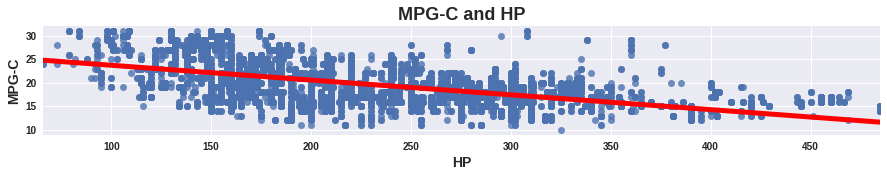

In [289]:
plt.figure(figsize=(15,2))
sns.regplot(x=df["HP"], y=df["MPG-C"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-C and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('MPG-C', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

**Graph Between MPG-H and Price**

(array([10., 20., 30., 40., 50.]), <a list of 5 Text major ticklabel objects>)

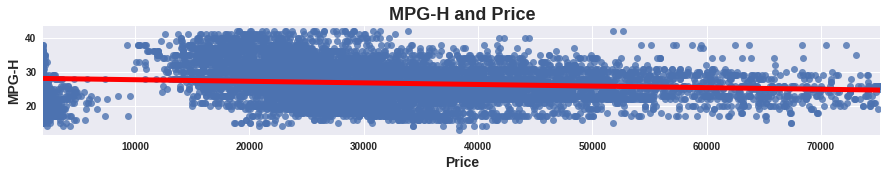

In [290]:
plt.figure(figsize=(15,2))
sns.regplot(x=df["Price"], y=df["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-H and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('MPG-H', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

**Graph Between MPG-C and Price**

(array([ 5., 10., 15., 20., 25., 30., 35.]),
 <a list of 7 Text major ticklabel objects>)

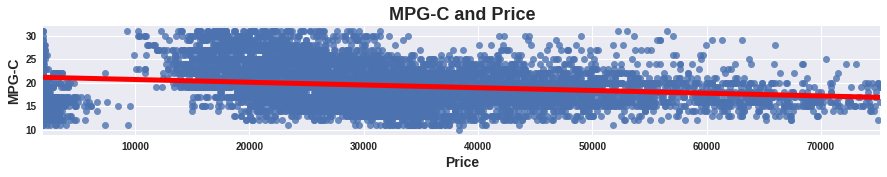

In [291]:
plt.figure(figsize=(15,2))
sns.regplot(x=df["Price"], y=df["MPG-C"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-C and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('MPG-C', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

**Graph Between Price and Transmission and Drive Mode**

Text(0.5, 1.0, 'Drive Mode')

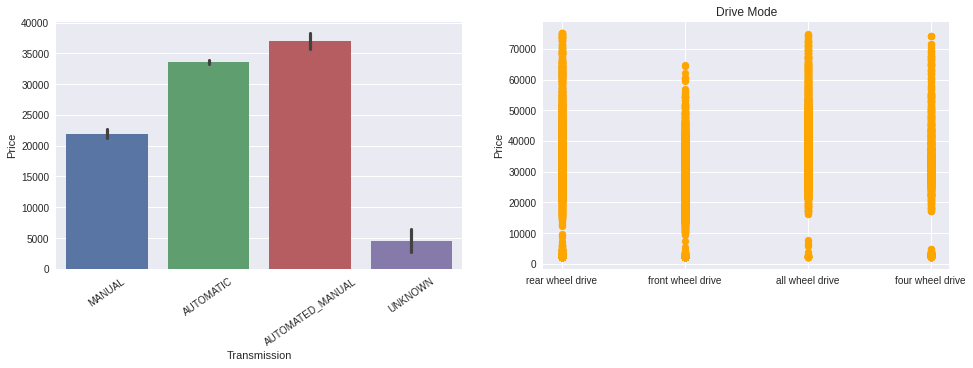

In [292]:
plt.style.use('seaborn')
fig= plt.figure(figsize=(16,10))
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.barplot(x=df['Transmission'], y=df['Price'])
plt.xticks(rotation=35)


#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.scatter(x=df['Drive Mode'], y=df['Price'], color='Orange')
plt.ylabel('Price')
plt.title('Drive Mode')

**Graph between Popularity and Price**

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]), <a list of 11 Text major ticklabel objects>)

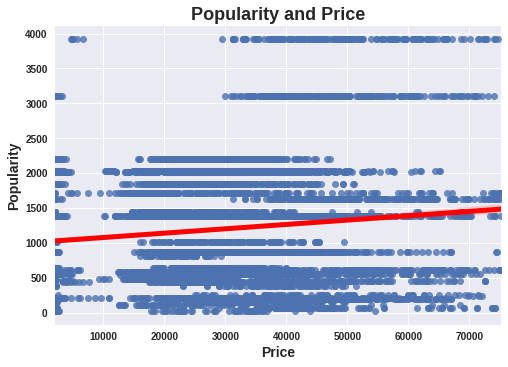

In [293]:
sns.regplot(x=df["Price"], y=df["Popularity"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('Popularity and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('Popularity', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

**Transmission Piechart**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



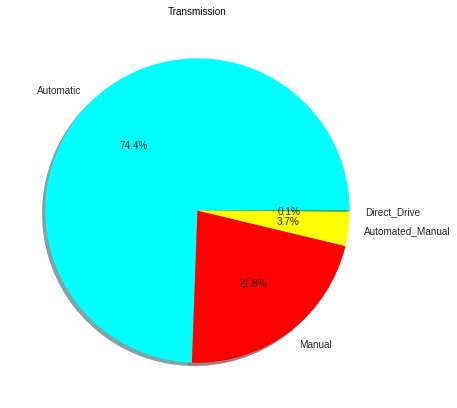

In [294]:
data_pie=df['Transmission'].value_counts().head(4).to_frame()
m= data_pie.style.background_gradient(cmap='Blues')
colors=['aqua','red','yellow','green']
labels= ['Automatic','Manual','Automated_Manual','Direct_Drive']
sizes= ['1123','881','809','746']
explode=[0.1,0.1,0.1,0.1]
values=df['Transmission'].value_counts().head(4).to_frame()

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True)
plt.title('Transmission',color='black',fontsize=10)
plt.show()

**Piechart of Drive Mode**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



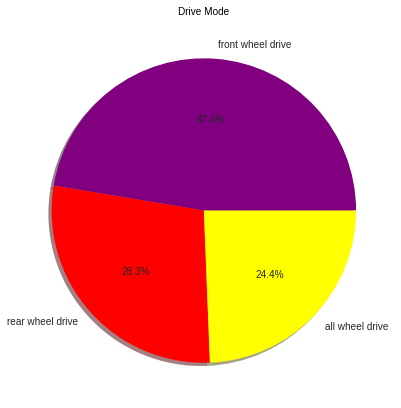

In [295]:
dt_pie=df['Drive Mode'].value_counts().head(3).to_frame()
m= dt_pie.style.background_gradient(cmap='Blues')
colors=['purple','red','yellow']
labels= ['front wheel drive','rear wheel drive','all wheel drive']
sizes= ['1123','881','809']
explode=[0.1,0.1,0.1]
values=df['Drive Mode'].value_counts().head(3).to_frame()

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Drive Mode',color='black',fontsize=10)
plt.show()

**Groups of Price**

In [296]:
df['price_range']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],labels=['less than 20K','20K-39K','40K-59K','60K-79K','80K-99K','Above 100K'],include_lowest=True)
df['price_range']=df['price_range'].astype(object)

Text(0.5, 0, '% of vehicles')

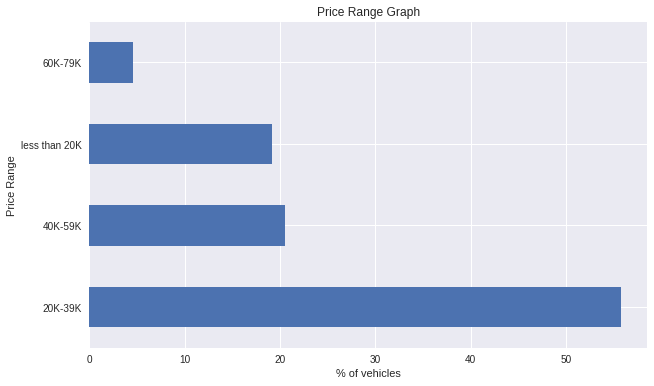

In [297]:
(df['price_range'].value_counts()/len(df)*100).plot.barh(figsize=(10,6))
plt.title("Price Range Graph")
plt.ylabel('Price Range')
plt.xlabel('% of vehicles')

**Graph Between Year and Price**

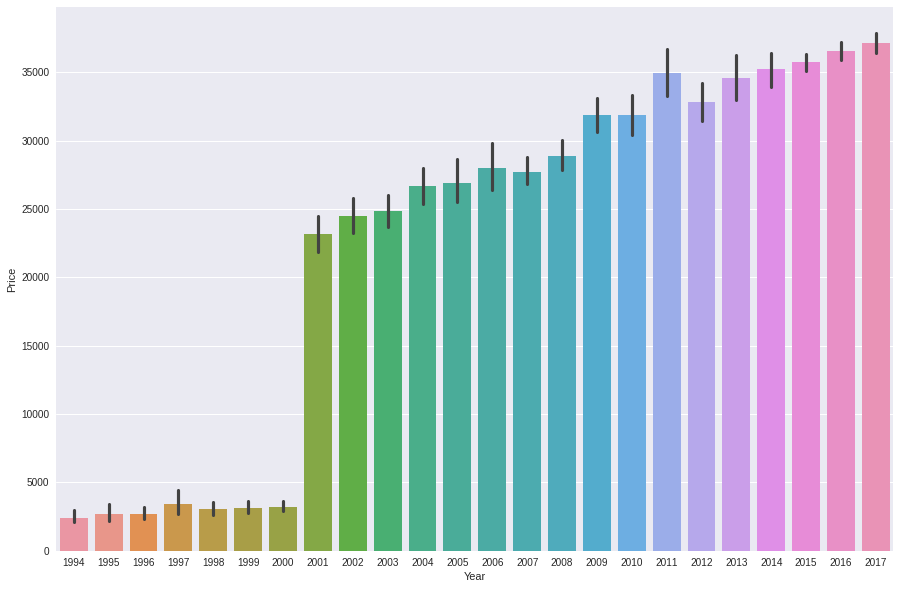

In [298]:
plt.figure(figsize=(15,10))
sns.barplot(df['Year'],df['Price'])

**Graph betwwen MPG-H and Price**

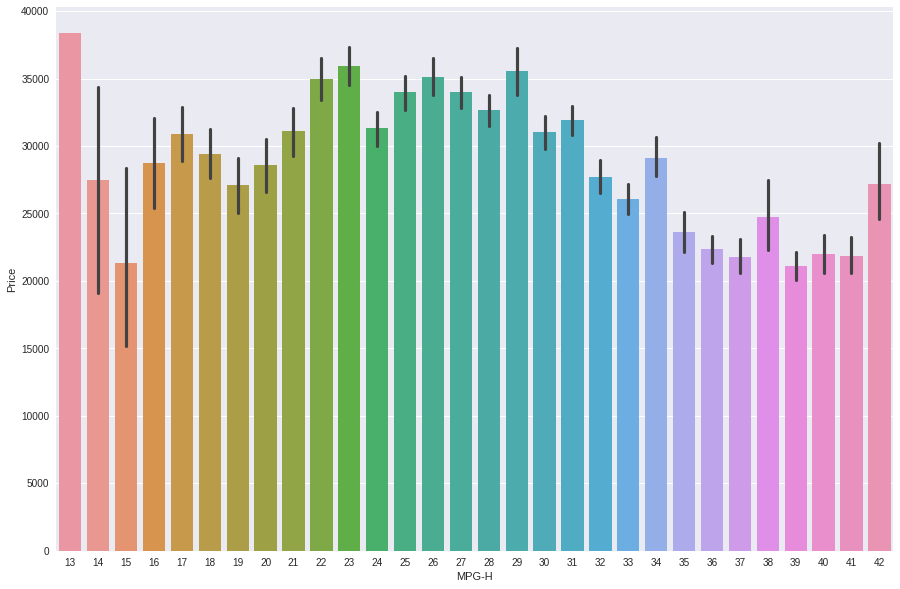

In [299]:
plt.figure(figsize=(15,10))
sns.barplot(df['MPG-H'],df['Price'])

**Graph betwwen MPG-C and Price**

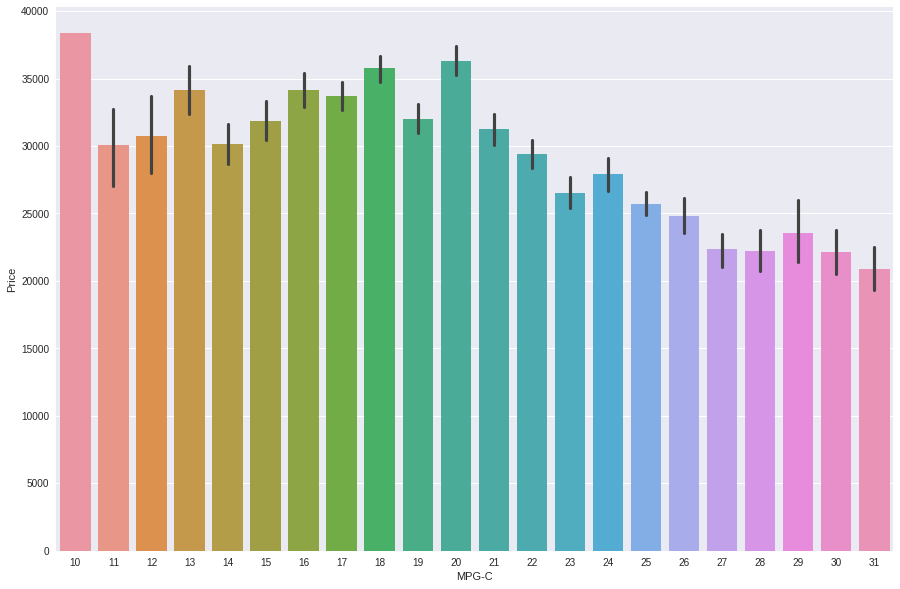

In [300]:
plt.figure(figsize=(15,10))
sns.barplot(df['MPG-C'],df['Price'])

**Graph betwwen cylinders and price**

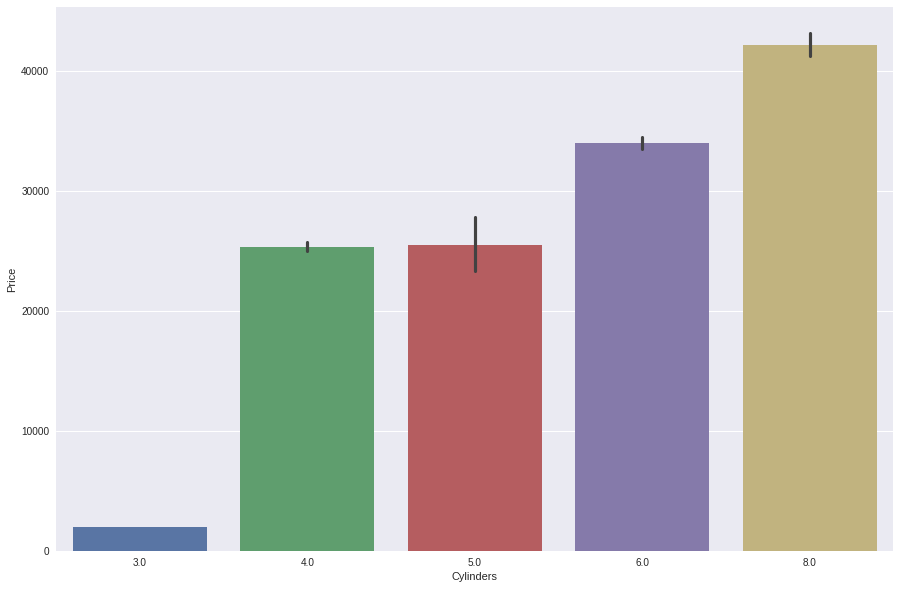

In [301]:
plt.figure(figsize=(15,10))
sns.barplot(df['Cylinders'],df['Price'])

**Document Insights from above graphs**

More the no the cylinders, more is the price

For MPG-H 13, price is maximum and for MPG-H 15, price is lowest.

For MPG-C 10, price is maximum and for MPG-C 31, price is minimum


**Splitting the dataset**

In [302]:
a=df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values     #except Price
b=df['Price'].values

In [303]:
from sklearn.preprocessing import StandardScaler    #Feature Scaling
sc_a=StandardScaler()
sc_b=StandardScaler()
a=sc_a.fit_transform(a)
b=sc_b.fit_transform(b.reshape(-1,1))

In [304]:
from sklearn.model_selection import train_test_split      #split data into train and test sets
atrain, atest, btrain, btest=train_test_split(a,b,test_size=0.2,random_state=0)

**Checking Algorithms**

In [305]:
from sklearn.linear_model import LinearRegression    #Fitting Linear Regression
regre=LinearRegression()
regre.fit(atrain,btrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

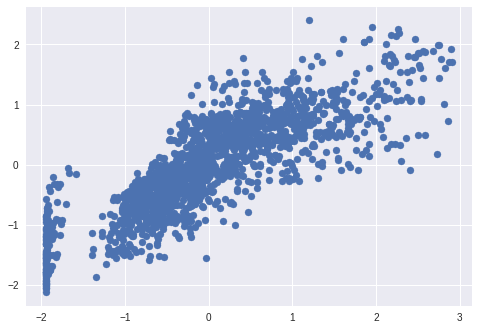

In [306]:
b_predict=regre.predict(atest)         #predicting test set results
plt.scatter(btest,b_predict)

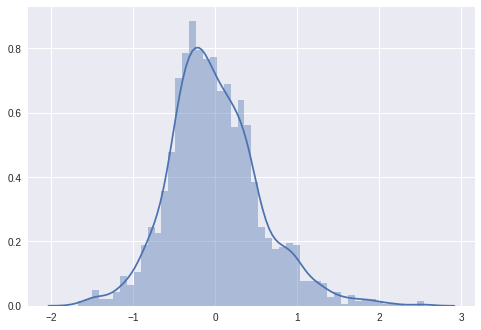

In [307]:
sns.distplot((btest-b_predict),bins=50)    #plotting graph

In [308]:
from sklearn import metrics                       #calculating the values
print('Mean Absolute Error(MAE) :', metrics.mean_absolute_error(btest,b_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(btest,b_predict)))
print('R2score :',metrics.r2_score(btest,b_predict))

Mean Absolute Error(MAE) : 0.43235022974967474
Root Mean Squared Error : 0.5638155596831141
R2score : 0.6877938550186761


In [309]:
from sklearn.preprocessing import PolynomialFeatures              #Polynomial Regression
polyreg=PolynomialFeatures(degree=4)
apoly=polyreg.fit_transform(atrain)
polyreg.fit(apoly,btrain)
linreg=LinearRegression()
linreg.fit(apoly,btrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

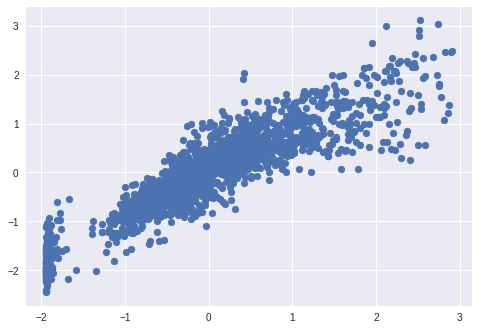

In [310]:
b_predict=linreg.predict(polyreg.fit_transform(atest))        #predicting result
plt.scatter(btest,b_predict)

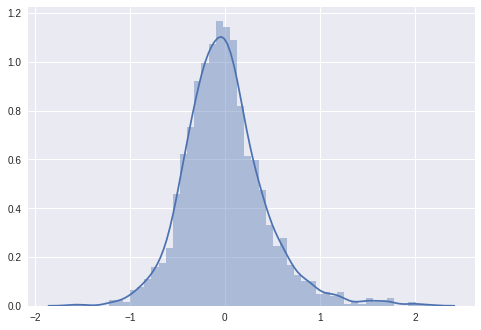

In [311]:
sns.distplot((btest-b_predict),bins=50)       #plotting Graph

In [312]:
from sklearn import metrics                           #calculating values
print('Mean Absolute Error(MAE) :', metrics.mean_absolute_error(btest,b_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(btest,b_predict)))
print('R2score :',metrics.r2_score(btest,b_predict))

Mean Absolute Error(MAE) : 0.3193303705388727
Root Mean Squared Error : 0.4313541931071063
R2score : 0.8172592592552269


In [313]:
from sklearn.svm import SVR           #Fitting SVR
regre=SVR(kernel='rbf')
regre.fit(atrain,btrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

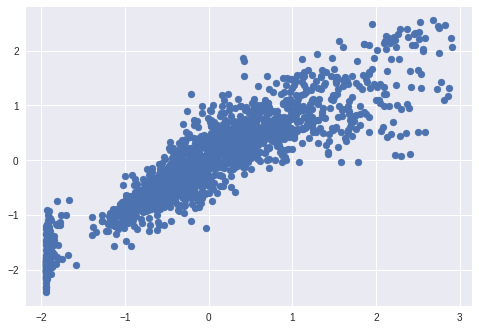

In [314]:
b_predict=regre.predict(atest)            #Predicting result
plt.scatter(btest,b_predict)

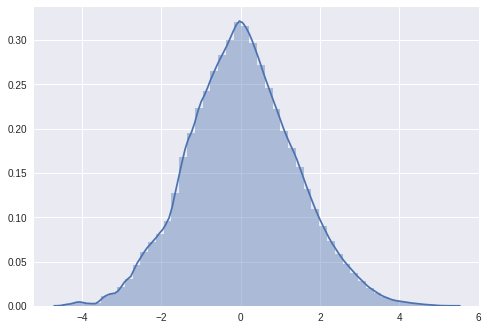

In [315]:
sns.distplot((btest-b_predict),bins=50)     #plotting graph

In [316]:
from sklearn import metrics             #calculating the values
print('Mean Absolute Error(MAE) :', metrics.mean_absolute_error(btest,b_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(btest,b_predict)))
print('R2score :',metrics.r2_score(btest,b_predict))

Mean Absolute Error(MAE) : 0.29963183321282105
Root Mean Squared Error : 0.4251005699656682
R2score : 0.8225194739222015


In [317]:
from sklearn.ensemble import RandomForestRegressor                  #Random Forest
regre=RandomForestRegressor(n_estimators=100,random_state=0)
regre.fit(atrain,btrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

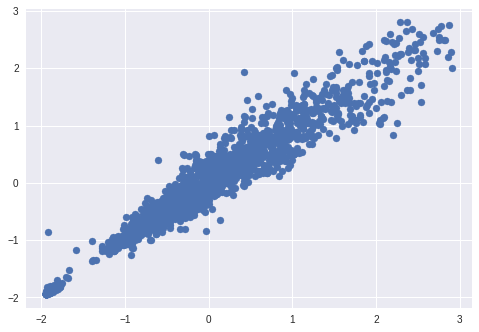

In [318]:
b_predict=regre.predict(atest)              #predicting result
plt.scatter(btest,b_predict)

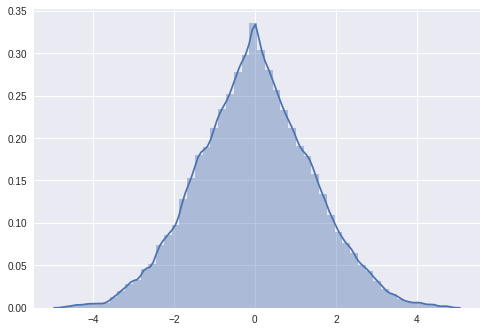

In [319]:
sns.distplot((btest-b_predict),bins=50)         #plotting graph

In [320]:
from sklearn import metrics         #calculating the values
print('Mean Absolute Error(MAE) :', metrics.mean_absolute_error(btest,b_predict))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(btest,b_predict)))
print('R2score :',metrics.r2_score(btest,b_predict))

Mean Absolute Error(MAE) : 0.18248131512894827
Root Mean Squared Error : 0.2596398652469564
R2score : 0.933792058849696


**Data Encoding** 

In [321]:
dcode=df

dcode["Make"]=dcode["Make"].astype("category")
dcode["Make"]=dcode["Make"].cat.codes

dcode["Model"] = dcode["Model"].astype('category')
dcode["Model"] = dcode["Model"].cat.codes

'''dcode["Year"]=dcode["Year"].astype("category")
dcode["Year"]=dcode["Year"].cat.codes
dcode["HP"]=dcode["HP"].astype("category")
dcode["HP"]=dcode["HP"].cat.codes
dcode["Cylinders"]=dcode["Cylinders"].astype("category")
dcode["Cylinders"]=dcode["Cylinders"].cat.codes
dcode["MPG-H"]=dcode["MPG-H"].astype("category")
dcode["MPG-H"]=dcode["MPG-H"].cat.codes
dcode["MPG-C"]=dcode["MPG-C"].astype("category")
dcode["MPG-C"]=dcode["MPG-C"].cat.codes
dcode["Popularity"]=dcode["Popularity"].astype("category")
dcode["Popularity"]=dcode["Popularity"].cat.codes'''

dcode["Transmission"]=dcode["Transmission"].astype("category")
dcode["Transmission"]=dcode["Transmission"].cat.codes

dcode["Drive Mode"]=dcode["Drive Mode"].astype("category")
dcode["Drive Mode"]=dcode["Drive Mode"].cat.codes

**Data Pre-processing**

In [322]:
from sklearn import preprocessing
X = np.asarray(dcode[['Make', 'Model', 'Transmission', 'Drive Mode']])
y = np.asarray(dcode['Price'])
X = preprocessing.StandardScaler().fit(X).transform(X)

**Splitting the data**

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=44)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6750, 4) (6750,)
(1688, 4) (1688,)


**Linear Regression**

In [324]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

Predicting Score

In [325]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_pred)

1.0

**Decision Tree**

In [326]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
d_m = DecisionTreeClassifier(random_state = 0)
d_m.fit(X_train,y_train)
y_pred = d_m.predict(X_test)
print("Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred)) 
print ("\nAccuracy : ", accuracy_score(y_test,y_pred)*100)

Confusion Matrix:

 [[42  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

Accuracy :  4.502369668246446


**Calculating the MSE, MAE, R square, RMSE values**

In [327]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination or R Squared : %.2f' % r2_score(y_test, y_pred))
print('MAE :%.2f' % mean_absolute_error(y_test, y_pred))
print('RMSE : %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 50170429.99
Coefficient of determination or R Squared : 0.77
MAE :4497.89
RMSE : 7083.11
